In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("./seasonStats.csv")

statsToMeasure = ["FGM", "FGA", "FGM3", "FGA3", "FTM", "FTA", "OR", "DR", "Ast", "TO", "Stl", "Blk", "PF"]
# statsToMeasure = [ "OR", "DR", "Ast", "TO", "Stl", "Blk", "PF"]
averageStats = ["AVG" + stat for stat in statsToMeasure]
oAverageStats = ["O" + stat for stat in averageStats]
ratStats = ["RAT" + stat for stat in statsToMeasure]

allStats = averageStats + oAverageStats + ratStats

teams = df["TeamID"].unique()
seasons = df["Season"].unique()

seasons = np.arange(2003,2024)

predictedWins = np.zeros(len(seasons))


models = [linear_model.LassoCV(cv=5, random_state=0, max_iter = 1000000),
         linear_model.RidgeCV(cv=5),
         linear_model.LinearRegression(),
         linear_model.ElasticNetCV(cv=5)
         ]

for j, model in enumerate(models):  
    coeffs = pd.DataFrame(columns = ratStats)
    for i, season in enumerate(seasons):
        seasonStatsMod = df.loc[df["AVGFGA3"] != 0]
        seasonStatsMod = seasonStatsMod.loc[seasonStatsMod["Season"] == season]
        seasonStatsMod = seasonStatsMod.loc[df["AVGFGA3"] != -1]
        #seasonStatsMod = seasonStatsMod.loc[seasonStatsMod["TeamID"] != 1181]
        X = seasonStatsMod[ratStats].to_numpy()
        #X = StandardScaler().fit_transform(X)
        y = seasonStatsMod["GamesWon"].to_numpy()

        reg = model.fit(X, y)

        Duke = df.loc[df["TeamID"] == 1181]
        Duke = Duke.loc[Duke["Season"] == season]
        Duke = Duke[ratStats].to_numpy()
        predictedWins[i] = reg.predict(Duke)

        coeffs.loc[len(coeffs)] = reg.coef_
        print(reg.score(X, y))
    coeffs.to_csv(f"./coeffs{j}.csv")

0.8925987290895181
0.8836871208009525
0.8799821610589222
0.8832308916749043
0.8790312982475083
0.9031730052871183
0.8908337524796899
0.9107747148022607
0.8841233048147507
0.9050506733925923
0.8770560699570672
0.8824704017462558
0.8931278956620814
0.8934114088732926
0.8952717005640373
0.9018848932123185
0.892229637164195
0.8903558642065437
0.7683853018752711
0.8853835153052836
0.8871266100531869
0.8922883575387719
0.8835076060841255
0.8797881252645414
0.8811827811641694
0.8807589300507593
0.9029722947355494
0.8881866880635245
0.9109089377825703
0.8821524127155749
0.9046274270519046
0.8785009268405748
0.8819260717500631
0.8922499989207686
0.8925516780486473
0.8959768573188199
0.9015061486581267
0.8902830065225843
0.890192605967234
0.7707415644663098
0.8853336454564836
0.8855314156682385
0.8928189874680867
0.8849408792351824
0.8817447661368508
0.8840619648730692
0.8816205480099335
0.9033333805370319
0.8918686181797899
0.9129958651222728
0.8848009436991715
0.9056371496177494
0.881690587772

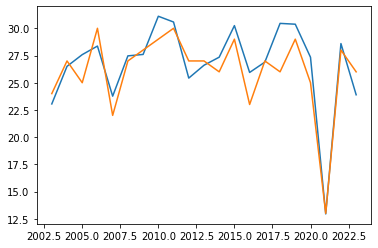

In [6]:
actualWins = df.loc[df["TeamID"] == 1181, "GamesWon"]
plt.plot(seasons, predictedWins)
plt.plot(seasons, actualWins)

In [78]:
df = pd.read_csv("./seasonStats.csv")
df = df.loc[df["AVGFGA3"] > 0]

X = df[ratStats].to_numpy()
y = df["GamesWon"].to_numpy()

from sklearn.feature_selection import RFE
estimator = linear_model.LassoCV(cv=5, random_state=0, max_iter = 1000000)
selector = RFE(estimator, n_features_to_select=2, step=1)
selector.fit(X, y)

chosen_features_indices = selector.get_support(indices=True)

for i in chosen_features_indices:
    print(ratStats[i])

RATDR
RATTO


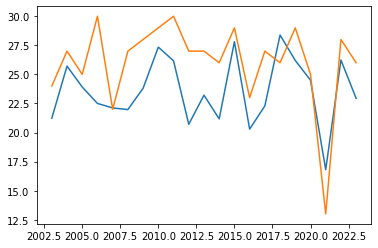

In [79]:
TeamID = 1181
actualWins = df.loc[df["TeamID"] == TeamID, "GamesWon"].to_numpy()
teamStats = df.loc[df["TeamID"] == TeamID, ratStats].to_numpy()
predictedWins = selector.predict(teamStats)

fig, ax = plt.subplots()
ax.plot(seasons, predictedWins)
ax.plot(seasons, actualWins)
plt.show()